In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

CNOT_matrix=np.array([[1,0,0,0],
                      [0,1,0,0],
                      [0,0,0,1],
                      [0,0,1,0]])
hadamard=(1/(np.sqrt(2)))*np.array([[1, 1],[1,-1]])
ghz= (np.array([[1],[0],[0],[0],[0],[0],[0],[1]])/np.sqrt(2)).reshape(8,)

swap= np.array([[1,0,0,0],
                [0,0,1,0],
                [0,1,0,0],
                [0,0,0,1]])

identity = np.identity(4)
bell= (np.array([[1],[0],[0],[1]])/np.sqrt(2)).reshape(4,)


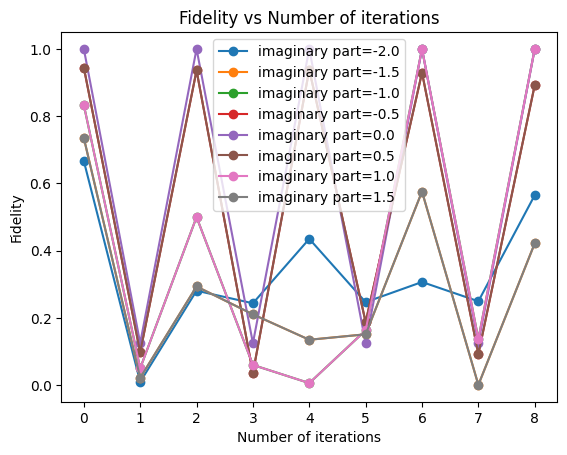

In [3]:
#initializing the state


psi_complex = np.empty(8,dtype=complex)


for w in np.arange(-2,2,0.5):
    real_part = 1
    imag_part = w
    psi_complex[0] = 1
    psi_complex[range(1,8)] = 0
    psi_complex[7] = complex(real_part, imag_part) * 1

    fidelity = 0
    psi_1=(psi_complex.reshape(8,))/np.linalg.norm(psi_complex)
    psi_2=psi_1

    f=[np.matmul(ghz.reshape(1,8),np.matmul((np.outer(psi_1,(np.conjugate(psi_1)))),ghz))]
    first_copy_of_the_state = 0
   
    for i in range(8):
        psi = np.kron(psi_1,psi_2)
        
        #performing swap operation 
        swap_tensored_1 =np.kron(np.identity(4),np.kron(swap,np.identity(4)))
        swaped_state_1= np.matmul(swap_tensored_1,psi)
        swap_tensored_2 =np.kron(np.identity(2),np.kron(np.kron(swap,swap),np.identity(2)))
        swaped_state= np.matmul(swap_tensored_2,swaped_state_1)


        #cnot operation on swapped qubits 
        cnot = np.kron(np.kron(CNOT_matrix,CNOT_matrix),CNOT_matrix)
        state_after_cnot = np.matmul(cnot,swaped_state)

        #swapping the states back 
        original_psi_1 = np.matmul(swap_tensored_2,state_after_cnot)
        original_psi = np.matmul(swap_tensored_1,original_psi_1)

        #hadamard operation 
        tensored_hadamard = np.kron(np.kron(hadamard,np.kron(hadamard,hadamard)),np.identity(8))



        #measurement
        projector= np.array([[1,0],[0,0]])
        projector_tensored = np.kron(np.identity(8),(np.kron(np.kron(projector,projector),projector)))

        measured = np.dot(projector_tensored,original_psi)


        #tracing out the measured copy
        final_state_after_hadamard_1= measured.reshape(2,2,2,2,2,2)
        final_state_after_hadamard = np.einsum('ijklmn->ijk', final_state_after_hadamard_1).reshape(8,)
        first_copy_of_the_state  = np.matmul(np.kron(hadamard,np.kron(hadamard,hadamard)),final_state_after_hadamard.reshape(8,1))


        # preparation of density matrix of bell state and psi state by taking the outer product between the states
        density_matrix_ghz = np.outer((ghz),np.conjugate(ghz)) 

        #dividing by the trace of density matrix to make it 1
        density_matrix_pp = np.outer(first_copy_of_the_state,np.conjugate(first_copy_of_the_state)) / np.trace(np.outer((first_copy_of_the_state),np.conjugate(first_copy_of_the_state)))


        #calculation of fidelity
        x = np.matmul(np.conjugate(ghz.reshape(1,8)),np.matmul(density_matrix_pp,ghz))
        fidelity = x
        
        psi_1 = first_copy_of_the_state
        psi_2 = first_copy_of_the_state
        

        f=f+[fidelity]

    plt.plot(range(9),f,label=f'imaginary part={w}',marker='o'),plt.legend()   

    # plt.plot(range(8),f,marker='o'),
    plt.xlabel('Number of iterations'),
    plt.ylabel('Fidelity'),
    plt.title('Fidelity vs Number of iterations')
   